In [ ]:
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

In [ ]:
songs1= pd.read_csv('tcc_ceds_music.csv')

In [ ]:
songs = songs1.head(10000)

In [ ]:
songs.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95.0,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51.0,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24.0,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54.0,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48.0,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482 entries, 0 to 5481
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5482 non-null   int64  
 1   artist_name               5482 non-null   object 
 2   track_name                5482 non-null   object 
 3   release_date              5482 non-null   int64  
 4   genre                     5482 non-null   object 
 5   lyrics                    5482 non-null   object 
 6   len                       5481 non-null   float64
 7   dating                    5481 non-null   float64
 8   violence                  5481 non-null   float64
 9   world/life                5481 non-null   float64
 10  night/time                5481 non-null   float64
 11  shake the audience        5481 non-null   float64
 12  family/gospel             5481 non-null   float64
 13  romantic                  5481 non-null   float64
 14  communic

In [ ]:
songs.isnull().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         1
dating                      1
violence                    1
world/life                  1
night/time                  1
shake the audience          1
family/gospel               1
romantic                    1
communication               1
obscene                     1
music                       1
movement/places             1
light/visual perceptions    1
family/spiritual            1
like/girls                  1
sadness                     1
feelings                    1
danceability                1
loudness                    1
acousticness                1
instrumentalness            1
valence                     1
energy                      1
topic                       1
age                         1
dtype: int64

In [ ]:
songs.shape

(5482, 31)

In [ ]:
songs.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [ ]:
unique_songs = songs['track_name'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 5108 unique songs in the dataset


In [ ]:
unique_artist=songs['artist'].unique().shape[0]
print(f"There are {unique_artist} unique artist in the dataset")

There are 1343 unique artist in the dataset


In [ ]:
release_songs=songs['release_date'].value_counts()
release_songs

1963    243
1981    241
1980    240
1968    237
1979    232
       ... 
1951     27
1954     22
1950     21
1955     19
1953     14
Name: release_date, Length: 70, dtype: int64

In [ ]:
count_genre=songs["genre"].value_counts()
count_genre

pop    5482
Name: genre, dtype: int64

In [ ]:
count_topic=songs['topic'].value_counts()
count_topic

sadness       2602
world/life    1991
violence      1583
obscene       1455
music          875
night/time     658
romantic       636
feelings       200
Name: topic, dtype: int64

<Axes: >

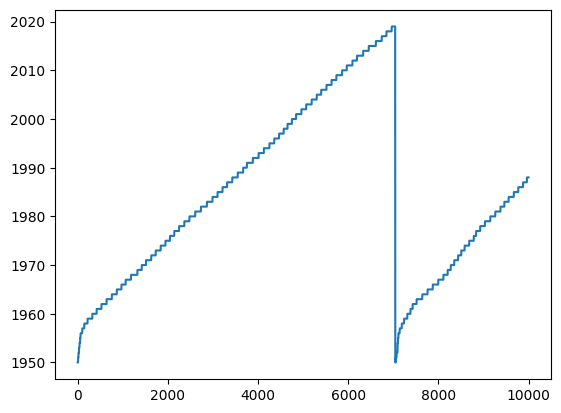

In [ ]:
songs['release_date'].plot.line()

<Axes: xlabel='genre', ylabel='release_date'>

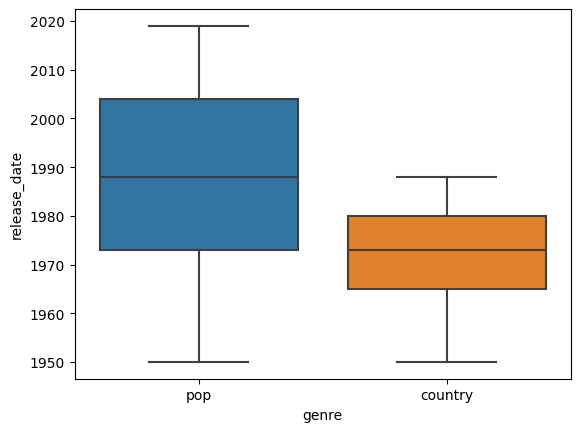

In [ ]:
df = songs[songs.genre.isin(songs.genre.value_counts().index)]

sns.boxplot(
    x='genre',
    y='release_date',
    data=df
)

In [ ]:
songs_cpy = songs[['artist_name', 'track_name', 'genre', 'lyrics', 'topic']]

In [ ]:
songs_cpy.columns

Index(['artist_name', 'track_name', 'genre', 'lyrics', 'topic'], dtype='object')

In [ ]:
songs_topic=songs[['sadness','violence','world/life',
'obscene',
'music',
'night/time',
'romantic',
'feelings' ]]

In [ ]:
songs_topic.columns

Index(['sadness', 'violence', 'world/life', 'obscene', 'music', 'night/time',
       'romantic', 'feelings'],
      dtype='object')

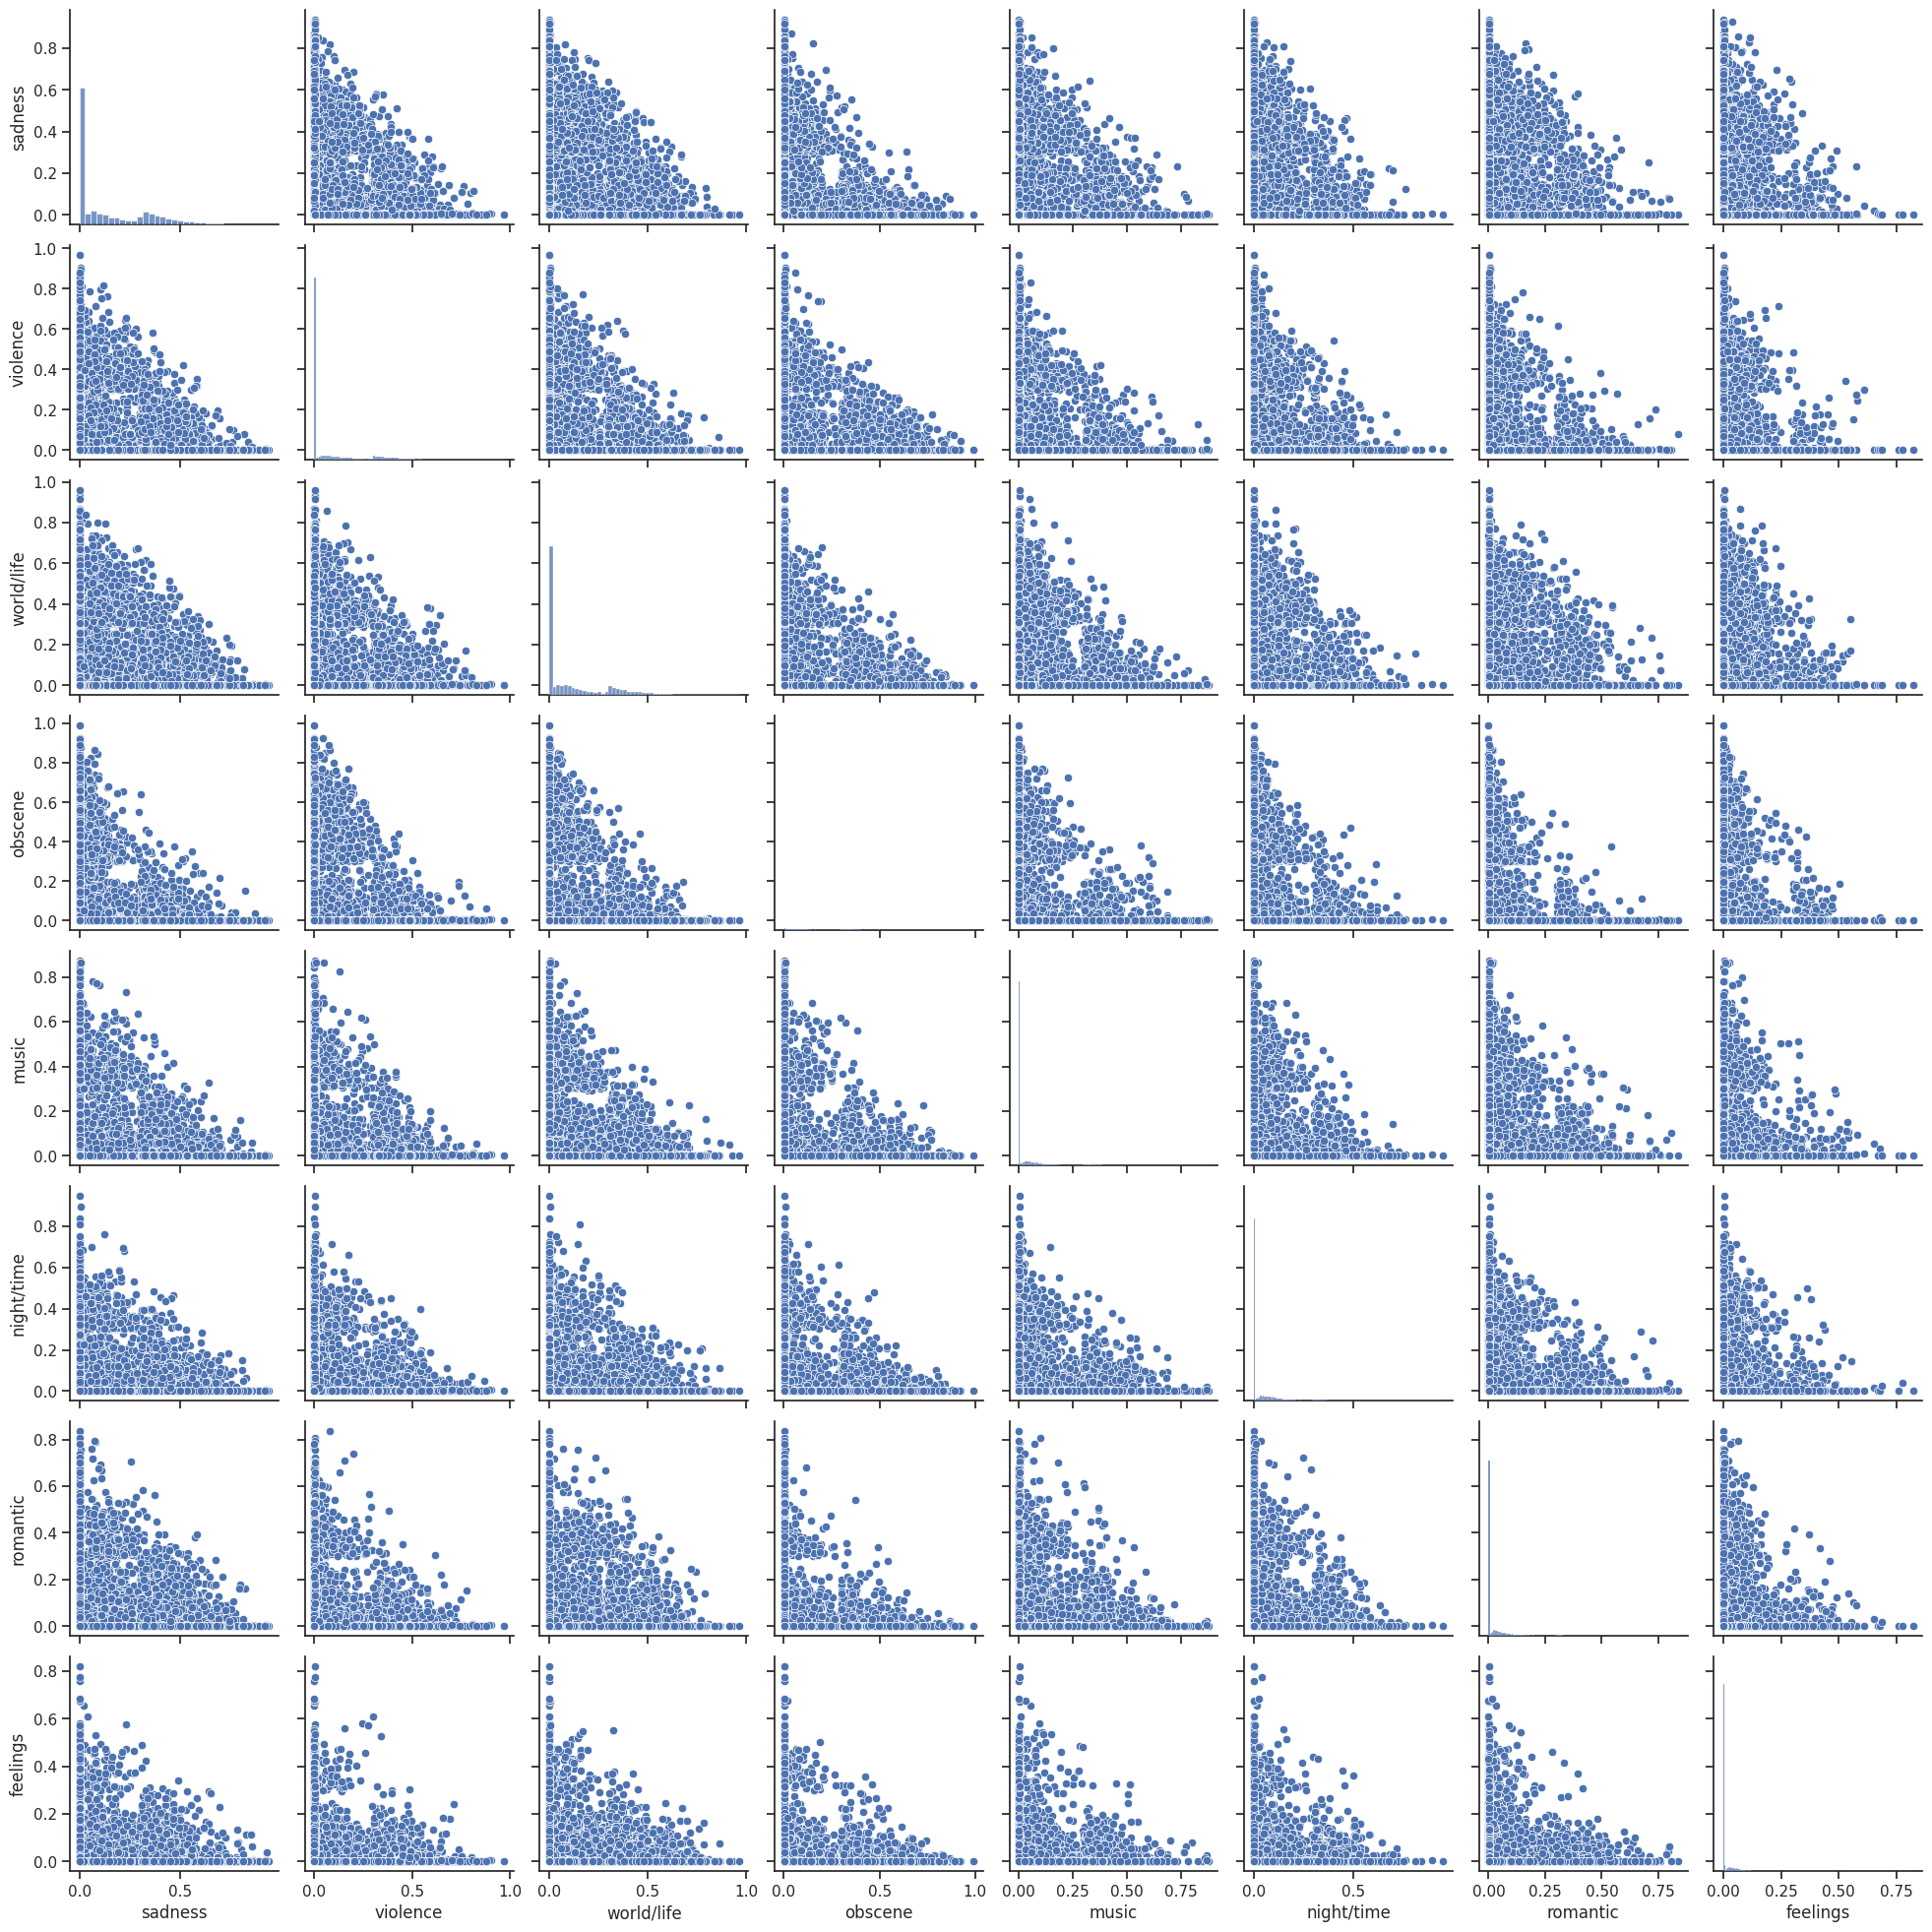

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(songs_topic)

In [ ]:
import ast

In [ ]:
songs_cpy['tags'] =   songs_cpy['topic']+" "+songs_cpy['genre'] + " "+songs_cpy['lyrics'] +" "+ songs_cpy['artist_name']

<ipython-input-30-2e24530ec5a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_cpy['tags'] =   songs_cpy['topic']+" "+songs_cpy['genre'] + " "+songs_cpy['lyrics'] +" "+ songs_cpy['artist_name']


In [ ]:
new = songs_cpy.drop(columns=['topic','genre','lyrics','artist_name'])
songs_cpy['tags'].head(2)

0    sadness pop hold time feel break feel untrue c...
1    world/life pop believe drop rain fall grow bel...
Name: tags, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [ ]:
vector = cv.fit_transform(new['tags']).toarray()
vector.shape

(10000, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)
similarity

array([[1.        , 0.01844704, 0.23063534, ..., 0.23747966, 0.11398342,
        0.05399632],
       [0.01844704, 1.        , 0.01303436, ..., 0.17308684, 0.02361985,
        0.06713529],
       [0.23063534, 0.01303436, 1.        , ..., 0.        , 0.        ,
        0.10271927],
       ...,
       [0.23747966, 0.17308684, 0.        , ..., 1.        , 0.06116395,
        0.0974312 ],
       [0.11398342, 0.02361985, 0.        , ..., 0.06116395, 1.        ,
        0.0354552 ],
       [0.05399632, 0.06713529, 0.10271927, ..., 0.0974312 , 0.0354552 ,
        1.        ]])

In [ ]:
def recommend_song(song):
    index = new[new['track_name'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].track_name)

In [ ]:
recommend_song('smalltown boy')

cranes in the sky
get away
if you go away
i'll fly away
if you go away
